In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import seaborn as sns

In [10]:
df=pd.read_csv('/content/drive/MyDrive/marketing_campaign.csv', sep="\t")

In [11]:
print(df.columns.tolist())

['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']


In [12]:
features = [
    'Income','MntWines','MntFruits','MntMeatProducts','MntFishProducts',
    'MntSweetProducts','MntGoldProds','NumDealsPurchases',
    'NumWebPurchases','NumCatalogPurchases','NumStorePurchases',
    'NumWebVisitsMonth','Recency'
]

data = df[features]


In [13]:
data = data.fillna(data.median())

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


In [15]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(data_scaled)


PCA()

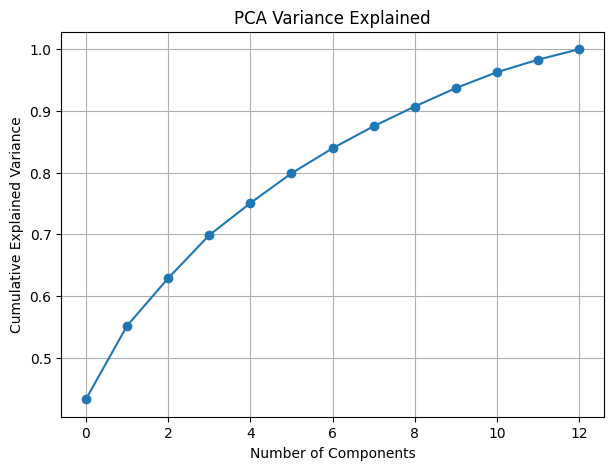

In [16]:
plt.figure(figsize=(7,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Variance Explained")
plt.grid()
plt.show()


In [17]:
variance = np.cumsum(pca.explained_variance_ratio_)
n_components_90 = np.argmax(variance >= 0.90) + 1
print("Components required for 90% variance:", n_components_90)


Components required for 90% variance: 9


In [18]:
pca_final = PCA(n_components=n_components_90)
data_pca = pca_final.fit_transform(data_scaled)

print("Original shape:", data_scaled.shape)
print("Reduced shape:", data_pca.shape)


Original shape: (2240, 13)
Reduced shape: (2240, 9)


In [19]:
loadings = pd.DataFrame(
    pca_final.components_.T,
    columns=[f"PC{i+1}" for i in range(n_components_90)],
    index=features
)

print("\nTop contributors to PC1:")
print(loadings["PC1"].abs().sort_values(ascending=False).head(5))

print("\nTop contributors to PC2:")
print(loadings["PC2"].abs().sort_values(ascending=False).head(5))



Top contributors to PC1:
NumCatalogPurchases    0.344484
MntMeatProducts        0.338476
Income                 0.316262
MntWines               0.315725
NumStorePurchases      0.314039
Name: PC1, dtype: float64

Top contributors to PC2:
NumDealsPurchases    0.635197
NumWebPurchases      0.495957
NumWebVisitsMonth    0.407355
MntWines             0.223503
MntGoldProds         0.195424
Name: PC2, dtype: float64


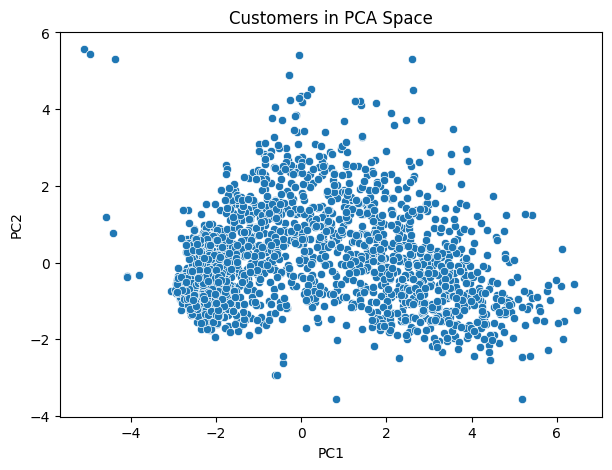

In [20]:
import seaborn as sns

pca_2d = PCA(n_components=2)
data_2d = pca_2d.fit_transform(data_scaled)

plt.figure(figsize=(7,5))
sns.scatterplot(x=data_2d[:,0], y=data_2d[:,1])
plt.title("Customers in PCA Space")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import time

start = time.time()
kmeans_orig = KMeans(n_clusters=4, random_state=42)
labels_orig = kmeans_orig.fit_predict(data_scaled)
time_orig = time.time() - start

sil_orig = silhouette_score(data_scaled, labels_orig)

print("Original Silhouette:", sil_orig)
print("Original Time:", time_orig)


Original Silhouette: 0.1639538667491216
Original Time: 0.11447405815124512


In [22]:
start = time.time()
kmeans_pca = KMeans(n_clusters=4, random_state=42)
labels_pca = kmeans_pca.fit_predict(data_pca)
time_pca = time.time() - start

sil_pca = silhouette_score(data_pca, labels_pca)

print("PCA Silhouette:", sil_pca)
print("PCA Time:", time_pca)


PCA Silhouette: 0.2685815564107652
PCA Time: 0.010266780853271484


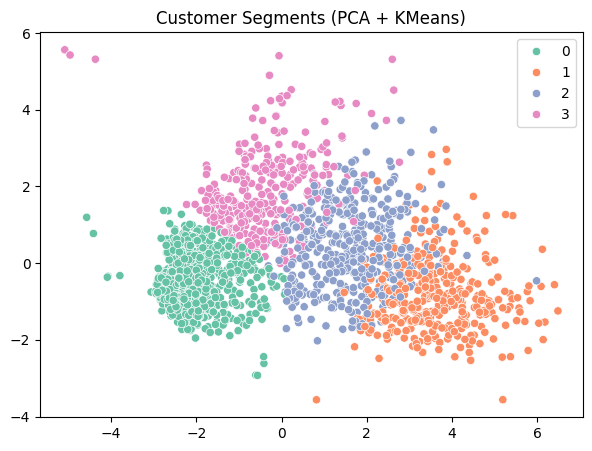

In [23]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=data_2d[:,0], y=data_2d[:,1], hue=labels_pca, palette="Set2")
plt.title("Customer Segments (PCA + KMeans)")
plt.show()